# import libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import confusion_matrix,classification_report,accuracy_score 
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data = pd.read_csv('C:\\Users\\LavaN-32428068\\Desktop\\python test\\data of Bank Personal Loan\\Bank_Personal_Loan_Modelling.csv')
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [3]:
df = pd.DataFrame(data)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [4]:
df['CCAvg']=df['CCAvg'] * 12
df['CCAvg']                   
#In order to make this column annual like the rest of the columns (the data set itself had said so)

0       19.2
1       18.0
2       12.0
3       32.4
4       12.0
        ... 
4995    22.8
4996     4.8
4997     3.6
4998     6.0
4999     9.6
Name: CCAvg, Length: 5000, dtype: float64

In [5]:
df.drop(['ID'],axis=1 , inplace=True)
df

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,19.2,1,0,0,1,0,0,0
1,45,19,34,90089,3,18.0,1,0,0,1,0,0,0
2,39,15,11,94720,1,12.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,32.4,2,0,0,0,0,0,0
4,35,8,45,91330,4,12.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,22.8,3,0,0,0,0,1,0
4996,30,4,15,92037,4,4.8,1,85,0,0,0,1,0
4997,63,39,24,93023,2,3.6,3,0,0,0,0,0,0
4998,65,40,49,90034,3,6.0,2,0,0,0,0,1,0


In [6]:
df['Experience'] = abs(df['Experience'])
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,23.255256,20.971908,0.0,8.4,18.0,30.0,120.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [8]:
df.isnull().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [9]:
#Dsns.pairplot(data=df1, diag_kind='kde')

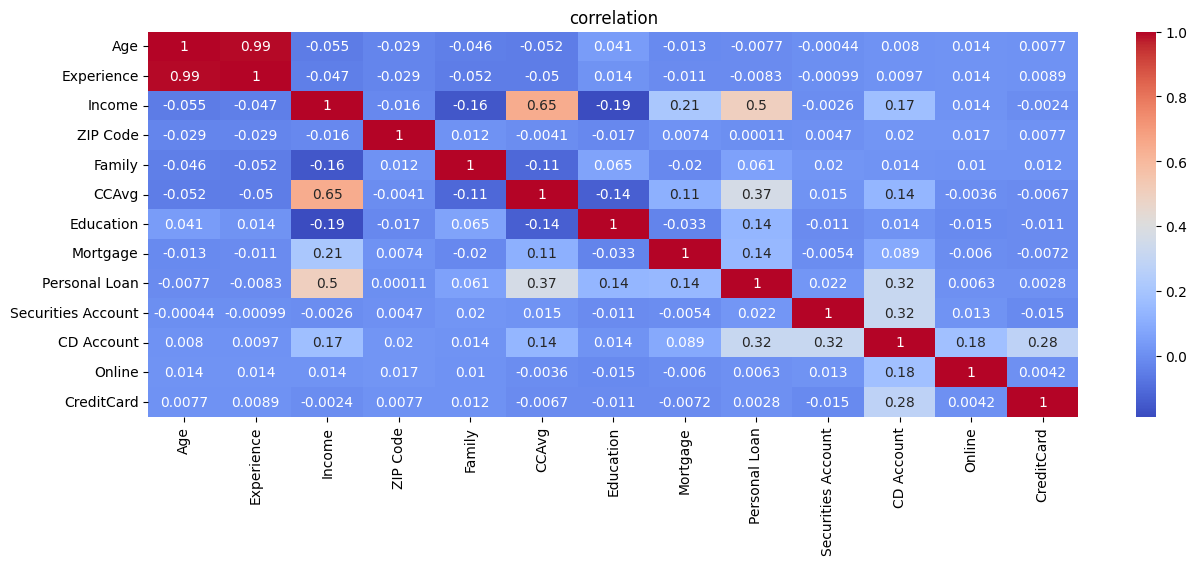

In [10]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr() ,  annot=True, cmap="coolwarm")
plt.title('correlation')
plt.show()

incom>ccavg>cd account>education>mortage 

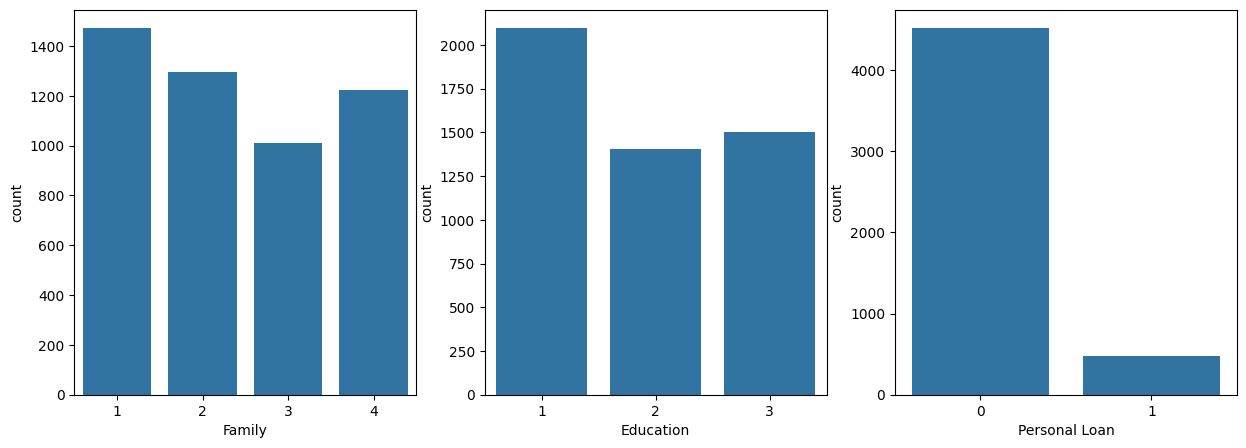

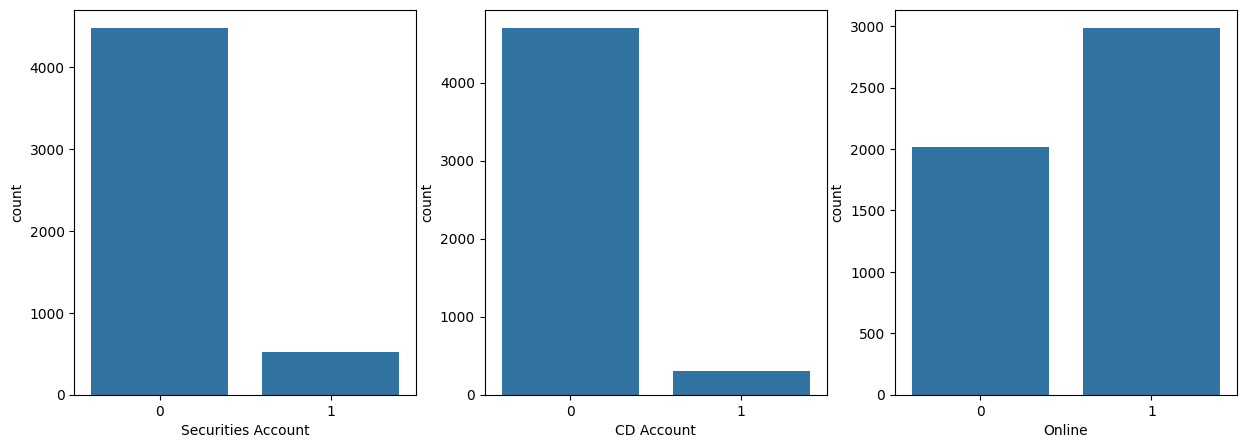

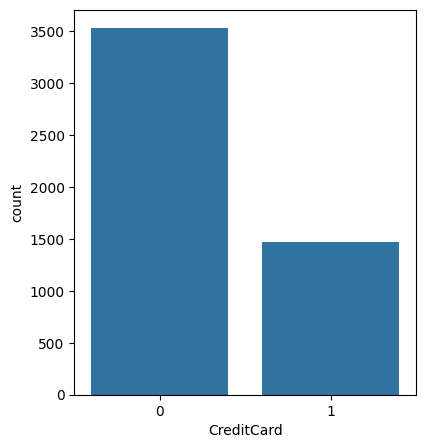

In [11]:
category=['Family','Education','Personal Loan','Securities Account','CD Account', 'Online','CreditCard']
i=0
while i <8:
    fig=plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    sns.countplot(x=category[i], data=df)
    i+=1
    if i==7:
        break
    plt.subplot(1,3,2)
    sns.countplot(x=category[i], data=df)
    i+=1
    plt.subplot(1,3,3)
    sns.countplot(x=category[i], data=df)
    i+=1
   
    plt.show()

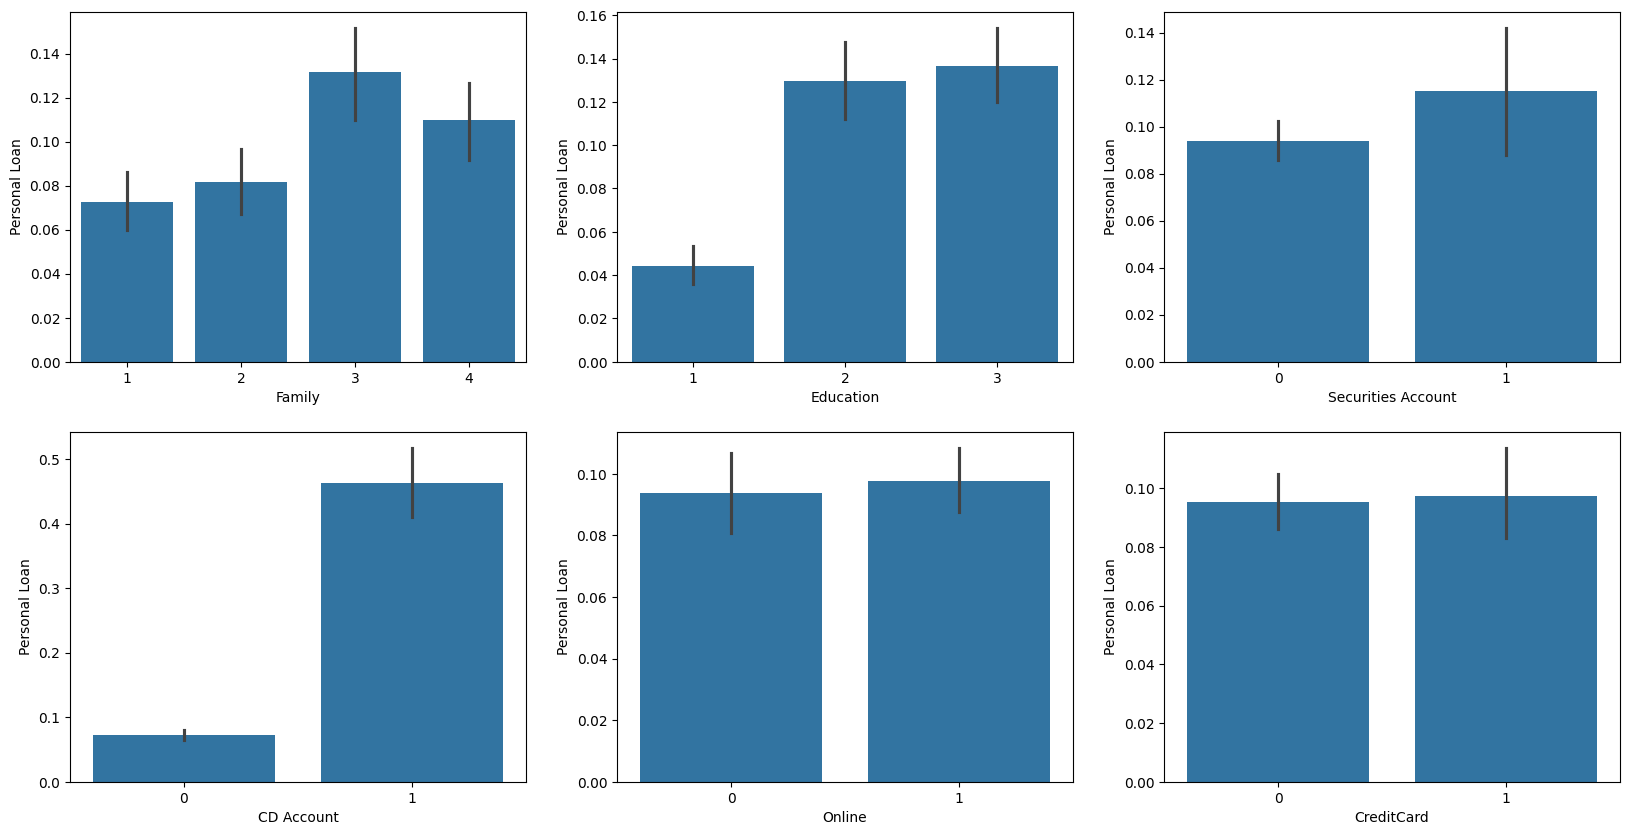

In [12]:
category=['Family','Education','Securities Account','CD Account', 'Online','CreditCard']
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(category):
    ax=fig.add_subplot(2,3,i+1)
    sns.barplot(x=col,y='Personal Loan',data=df)

<Axes: xlabel='Education', ylabel='Income'>

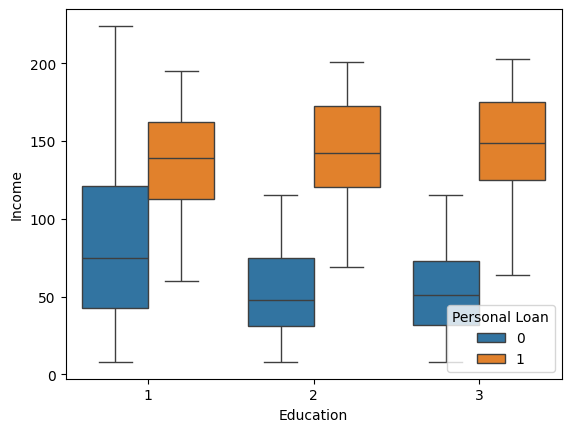

In [13]:
sns.boxplot(x='Education',y= 'Income' ,hue= 'Personal Loan', data=df)

<Axes: xlabel='Education', ylabel='count'>

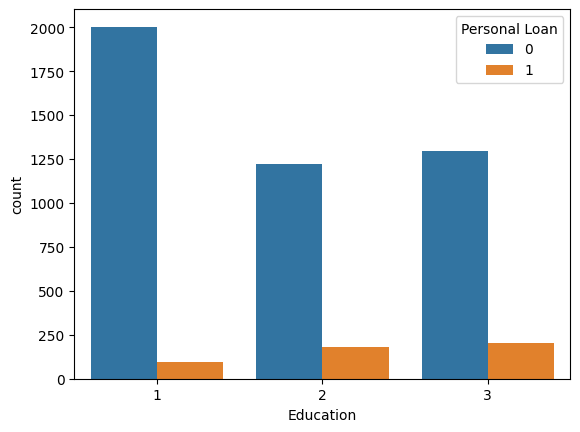

In [14]:
sns.countplot(x='Education',hue='Personal Loan', data=df)

<Axes: xlabel='Family', ylabel='Income'>

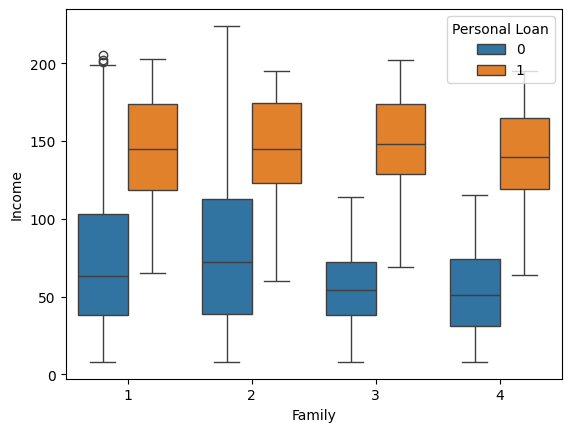

In [15]:
sns.boxplot(x='Family',y= 'Income' ,hue= 'Personal Loan', data=df)

<Axes: xlabel='Family', ylabel='CCAvg'>

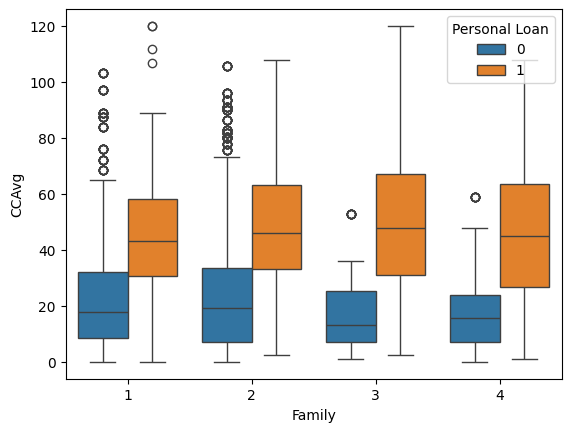

In [16]:
sns.boxplot(x='Family',y= 'CCAvg' ,hue= 'Personal Loan', data=df)

<Axes: xlabel='Education', ylabel='CCAvg'>

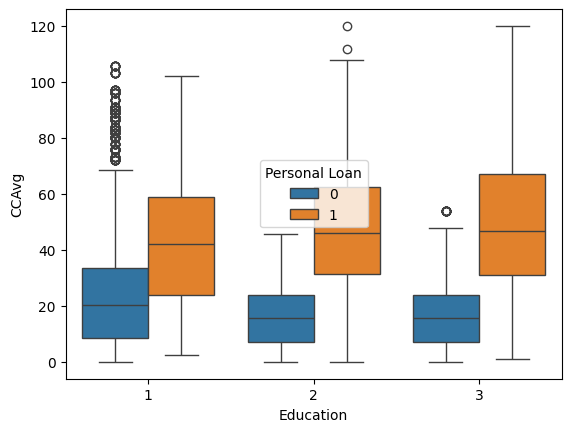

In [17]:
sns.boxplot(x='Education',y= 'CCAvg' ,hue= 'Personal Loan', data=df)

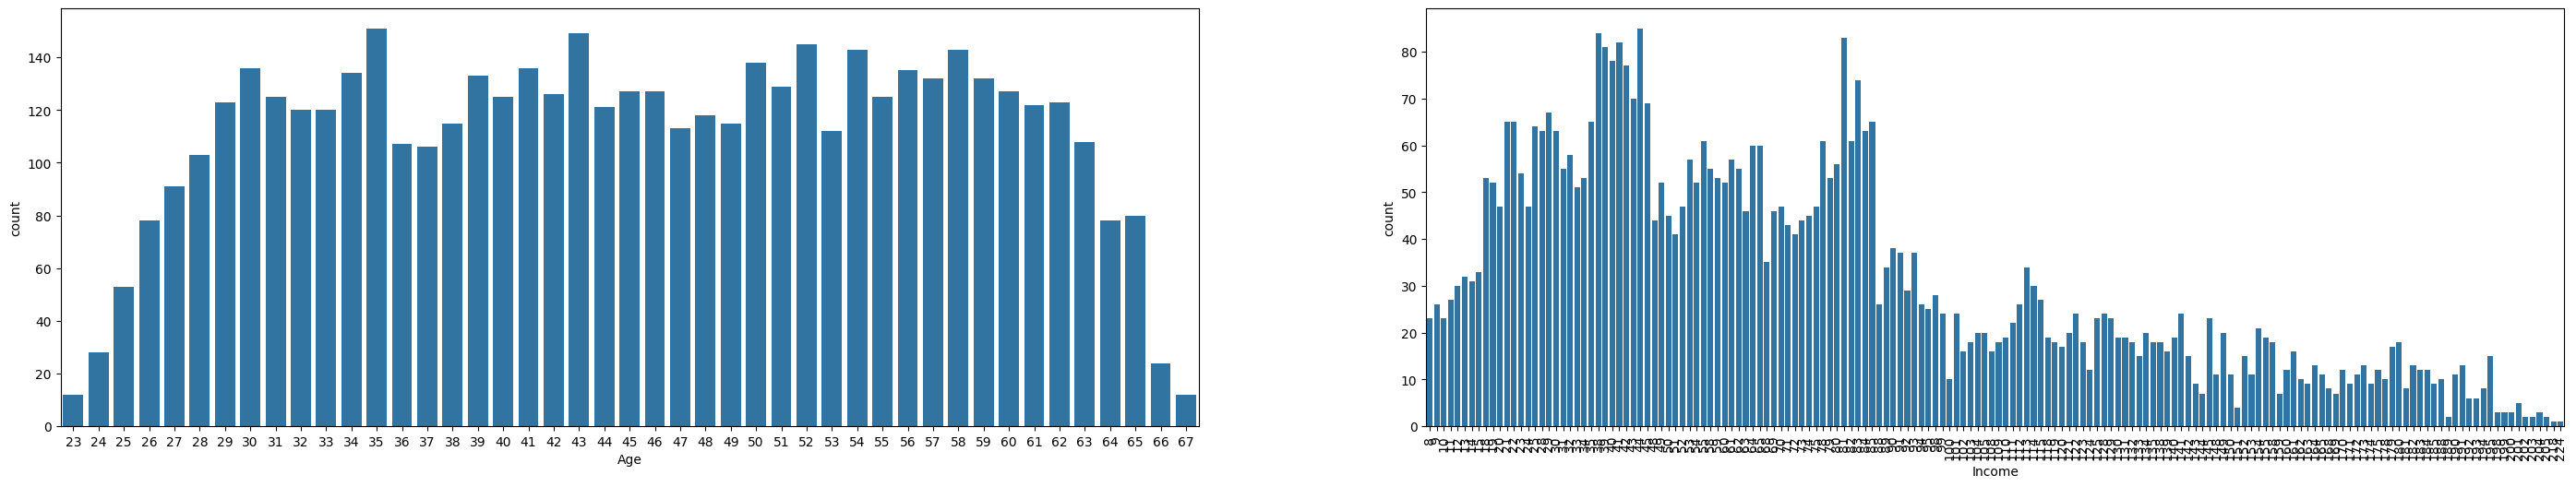

In [18]:
fig = plt.figure(figsize=[35,20])
plt.subplot(3,2,1)
sns.countplot(x= df.Age , data=df)

plt.subplot(3,2,2)
sns.countplot(x= df.Income , data=df)
plt.xticks(rotation=90 )
plt.show()

# ML

In [19]:
x = df.drop('Personal Loan' , axis=1).values
y = df['Personal Loan'].values.reshape(-1,1)

In [20]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3 , random_state=0)

# KNN

In [21]:
k = 4
clf = KNeighborsClassifier(k)
clf.fit(x_train , y_train.ravel())
y_pred = clf.predict(x_test)

In [22]:
print('accuracy:' , metrics.accuracy_score(y_test , y_pred))

accuracy: 0.9133333333333333


In [23]:
k = 20
acc = np.zeros((k))
for i in range (1,k+1):
    knn = KNeighborsClassifier(i)
    knn.fit(x_train , y_train.ravel())
    y_pred = knn.predict(x_test)
    acc[i-1] = metrics.accuracy_score(y_test , y_pred)
print(acc)

[0.88666667 0.90133333 0.90066667 0.91333333 0.90666667 0.906
 0.906      0.908      0.90933333 0.90933333 0.912      0.91133333
 0.912      0.914      0.91333333 0.91333333 0.91533333 0.914
 0.914      0.91666667]


In [24]:
'''train_acc = []
test_acc = []
neighbors_setting = range(1,20)
for i in neighbors_setting:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(x_train , y_train.ravel())
    train_acc.append(clf.score(x_train,y_train))
    test_acc.append(clf.score(x_test,y_test))
plt.plot(neighbors_setting , train_acc , label = 'accuracy of the train set')
plt.plot(neighbors_setting , test_acc , label = 'accuracy of the test set')
plt.ylabel('accuracy')
plt.xlabel('number of neighbors')
plt.grid()
plt.legend()'''

"train_acc = []\ntest_acc = []\nneighbors_setting = range(1,20)\nfor i in neighbors_setting:\n    clf = KNeighborsClassifier(n_neighbors=i)\n    clf.fit(x_train , y_train.ravel())\n    train_acc.append(clf.score(x_train,y_train))\n    test_acc.append(clf.score(x_test,y_test))\nplt.plot(neighbors_setting , train_acc , label = 'accuracy of the train set')\nplt.plot(neighbors_setting , test_acc , label = 'accuracy of the test set')\nplt.ylabel('accuracy')\nplt.xlabel('number of neighbors')\nplt.grid()\nplt.legend()"

In [25]:
parameters = {'n_neighbors':range(1,50)}
grid_kn = GridSearchCV (estimator = knn,
                       param_grid = parameters,
                       scoring = 'accuracy',
                       cv=5,
                       verbose=1,
                       n_jobs = -1)
grid_kn.fit(x_train,y_train.ravel())

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=20), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 50)}, scoring='accuracy',
             verbose=1)

In [26]:
grid_kn.best_params_ 

{'n_neighbors': 2}

In [27]:
clf.classes_

array([0, 1], dtype=int64)

In [28]:
metrics.confusion_matrix(y , clf.predict(x))

array([[4481,   39],
       [ 348,  132]], dtype=int64)

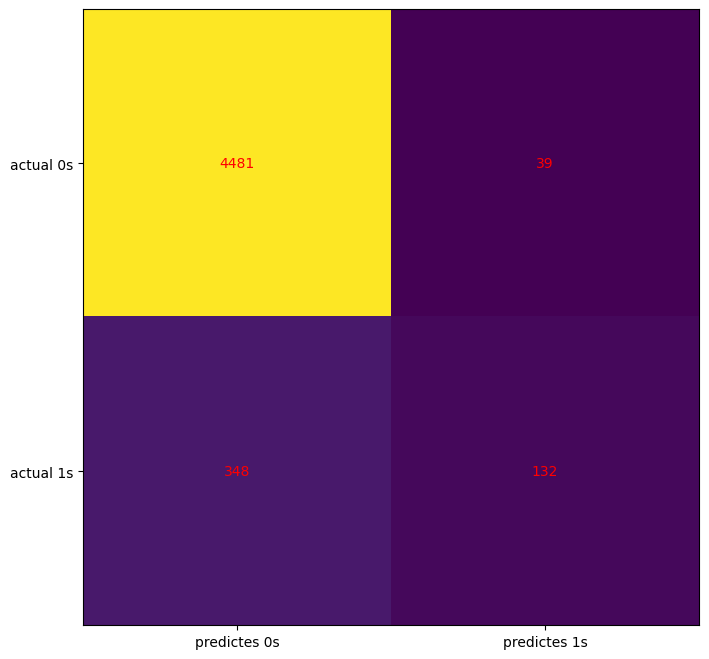

In [29]:
cm = metrics.confusion_matrix(y , clf.predict(x))
fig,ax = plt.subplots(figsize=(8 , 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=('predictes 0s','predictes 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('actual 0s','actual 1s'))
ax.set_ylim (1.5 , -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j , i,cm[i,j], ha='center' , va='center' , color='red')
plt.show()

In [30]:
predict1 = clf.predict([[34,9,180,93023,1,106.8,3,0,1,0,0,0]])
predict1

array([1], dtype=int64)

In [31]:
df[df['Personal Loan']==1]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
9,34,9,180,93023,1,106.8,3,0,1,0,0,0,0
16,38,14,130,95010,4,56.4,3,134,1,0,0,0,0
18,46,21,193,91604,2,97.2,3,0,1,0,0,0,0
29,38,13,119,94104,1,39.6,2,0,1,0,1,1,1
38,42,18,141,94114,3,60.0,3,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,38,13,129,92646,3,49.2,3,0,1,0,1,1,1
4927,43,19,121,94720,1,8.4,2,0,1,0,1,1,1
4941,28,4,112,90049,2,19.2,2,0,1,0,0,1,0
4962,46,20,122,90065,3,36.0,3,0,1,0,1,1,1


# Logestic regression

bayad jaye sefr va yek sotoon hara ba adad digar jabeja kard leza sefr tasiri nadarad 
braye modelman yek solver entekhab konim

In [32]:
x = df.drop('Personal Loan' , axis=1).values
y = df['Personal Loan'].values.reshape(-1,1)
test_size = [0.1 , 0.15, 0.2 , 0.25 , 0.3 , 0.35]
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
dic = {'test_size' : [] , 'solver' :[] , 'r2score' : []}
for i in test_size:
    for j in solvers:
        x_train , x_test , y_train , y_test = train_test_split(x,y,test_size= i , random_state=0)
        lograge = LogisticRegression(solver= j)
        lograge.fit(x_train , y_train.ravel())
        y_pred = lograge.predict(x_test)
        dic["test_size"].append(i)
        dic['solver'].append(j)
        dic['r2score'].append(metrics.r2_score(y_test , y_pred))   
besti = pd.DataFrame(dic)
print(besti)

#For bala miyad be ma neshon mide behtarin solver va behtarin test size braye amoozesh ra

    test_size           solver   r2score
0        0.10            lbfgs -0.013724
1        0.10        liblinear -0.039717
2        0.10        newton-cg  0.480141
3        0.10  newton-cholesky  0.532127
4        0.10              sag -0.091703
5        0.10             saga -0.091703
6        0.15            lbfgs  0.376755
7        0.15        liblinear -0.027513
8        0.15        newton-cg  0.494666
9        0.15  newton-cholesky  0.528355
10       0.15              sag -0.094891
11       0.15             saga -0.094891
12       0.20            lbfgs  0.010989
13       0.20        liblinear  0.010989
14       0.20        newton-cg  0.474969
15       0.20  newton-cholesky  0.499389
16       0.20              sag -0.098901
17       0.20             saga -0.098901
18       0.25            lbfgs  0.016913
19       0.25        liblinear  0.027048
20       0.25        newton-cg  0.452715
21       0.25  newton-cholesky  0.483119
22       0.25              sag -0.094571
23       0.25   

In [33]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size= 0.1 , random_state=0)
lograge = LogisticRegression(solver= 'newton-cholesky')
lograge.fit(x_train , y_train.ravel())
y_pred = lograge.predict(x_test)

In [34]:
print('mean_absolute_error : ' , metrics.mean_absolute_error(y_test , y_pred))
print('mean_squared_error : ' , metrics.mean_squared_error(y_test , y_pred))
print('RMSE : ' ,np.sqrt(metrics.mean_squared_error(y_test , y_pred)) )
print('r2_score : ', metrics.r2_score(y_test , y_pred))
print ('accuracy :' , metrics.accuracy_score(y_test , y_pred))

mean_absolute_error :  0.036
mean_squared_error :  0.036
RMSE :  0.18973665961010275
r2_score :  0.5321272613849033
accuracy : 0.964


In [35]:
lograge.classes_

array([0, 1], dtype=int64)

In [36]:
kfold = KFold(5)
result = cross_val_score(lograge,x,y.ravel(),cv=kfold)

print(result)
print(np.mean(result))

[0.95  0.939 0.952 0.952 0.956]
0.9498


In [37]:
lograge.intercept_

array([-11.26837535])

In [38]:
lograge.coef_   #incom>ccavg>cd account>education>mortage    
# Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard

array([[-4.38586904e-02,  5.45863712e-02,  5.25689664e-02,
        -9.15899788e-06,  6.54678285e-01,  1.10723979e-02,
         1.71160555e+00,  7.45435372e-04, -6.23020757e-01,
         3.34249952e+00, -6.70810749e-01, -9.83099886e-01]])

In [39]:
r2_score = metrics.r2_score(y_test , y_pred)
df1 = df.drop('Personal Loan' , axis=1)
print ('last r2_score =',r2_score)
for column in df1 :
    new_column_name = (column+str(2))
    new_column_value = df1[column]**2
    df1.insert(0 , new_column_name , new_column_value)
    
    x2 = df1.values
    y2 = df['Personal Loan'].values.reshape(-1,1)

    x_train2 , x_test2 , y_train2 , y_test2 = train_test_split(x2,y2,test_size=0.1 , random_state=0)

    lograge2 = LogisticRegression(solver= 'newton-cholesky')
    lograge2.fit(x_train2 , y_train2.ravel())

    y_pred2 = lograge2.predict(x_test2)
    new_r2 = metrics.r2_score(y_test2 , y_pred2)
    
    if new_r2 > r2_score:
        r2_score = new_r2
    else :
        df1 = df1.drop(new_column_name , axis=1)
print('new r2_score =' , r2_score)
print('accuracy :' , metrics.accuracy_score(y_test2 , y_pred2))

last r2_score = 0.5321272613849033
new r2_score = 0.6620919110002079
accuracy : 0.974


In [40]:
df1

,Income2,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,2401,25,1,49,91107,4,19.2,1,0,1,0,0,0
1,1156,45,19,34,90089,3,18.0,1,0,1,0,0,0
2,121,39,15,11,94720,1,12.0,1,0,0,0,0,0
3,10000,35,9,100,94112,1,32.4,2,0,0,0,0,0
4,2025,35,8,45,91330,4,12.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1600,29,3,40,92697,1,22.8,3,0,0,0,1,0
4996,225,30,4,15,92037,4,4.8,1,85,0,0,1,0
4997,576,63,39,24,93023,2,3.6,3,0,0,0,0,0
4998,2401,65,40,49,90034,3,6.0,2,0,0,0,1,0


In [41]:
in2_age = df1['Income2']*df1['Age']
in2_exp = df1['Income2']*df1['Experience']
in2_inc = df1['Income2']*df1['Education']
in2_zip = df1['Income2']*df1['ZIP Code']    
in2_fam = df1['Income2']*df1['Family']
in2_cca = df1['Income2']*df1['CCAvg']    
in2_cd = df1['Income2']*df1['CD Account']
in2_mor = df1['Income2']*df1['Mortgage']    
in2_sec = df1['Income2']*df1['Securities Account']
in2_onl = df1['Income2']*df1['Online']    
in2_cre = df1['Income2']*df1['CreditCard']

In [42]:
df2 = df1.copy()
df2.insert(0 ,'Income2*Age',in2_age )
df2.insert(0 ,'Income2*Experince',in2_exp )
df2.insert(0 ,'Income2*Education',in2_inc )
df2.insert(0 ,'Income2*Zipcode',in2_zip )
df2.insert(0 ,'Income2*Family',in2_fam )
df2.insert(0 ,'Income2*CCAvg',in2_cca )
df2.insert(0 ,'Income2*CD',in2_cd )
df2.insert(0 ,'Income2*Mortage',in2_mor )
df2.insert(0 ,'Income2*Securities Account',in2_sec )
df2.insert(0 ,'Income2*Online',in2_onl )
df2.insert(0 ,'Income2*CreditCard',in2_cre )

In [43]:
df2

,Income2*CreditCard,Income2*Online,Income2*Securities Account,Income2*Mortage,Income2*CD,Income2*CCAvg,Income2*Family,Income2*Zipcode,Income2*Education,Income2*Experince,...,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,0,0,2401,0,0,46099.2,9604,218747907,2401,2401,...,49,91107,4,19.2,1,0,1,0,0,0
1,0,0,1156,0,0,20808.0,3468,104142884,1156,21964,...,34,90089,3,18.0,1,0,1,0,0,0
2,0,0,0,0,0,1452.0,121,11461120,121,1815,...,11,94720,1,12.0,1,0,0,0,0,0
3,0,0,0,0,0,324000.0,10000,941120000,20000,90000,...,100,94112,1,32.4,2,0,0,0,0,0
4,2025,0,0,0,0,24300.0,8100,184943250,4050,16200,...,45,91330,4,12.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,1600,0,0,0,36480.0,1600,148315200,4800,4800,...,40,92697,1,22.8,3,0,0,0,1,0
4996,0,225,0,19125,0,1080.0,900,20708325,225,900,...,15,92037,4,4.8,1,85,0,0,1,0
4997,0,0,0,0,0,2073.6,1152,53581248,1728,22464,...,24,93023,2,3.6,3,0,0,0,0,0
4998,0,2401,0,0,0,14406.0,7203,216171634,4802,96040,...,49,90034,3,6.0,2,0,0,0,1,0


In [44]:
x3 = df2.values
y3 = df['Personal Loan'].values.reshape(-1,1)

x_train3 , x_test3 , y_train3 , y_test3 = train_test_split(x3,y3,test_size=0.1 , random_state=0)

lograge3 = LogisticRegression(solver= 'newton-cholesky')
lograge3.fit(x_train3 , y_train3.ravel())

y_pred3 = lograge3.predict(x_test3)
new_r2 = metrics.r2_score(y_test3 , y_pred3)
new_r2

-0.11769598669162007

hamoon df1 behtare 

In [45]:
metrics.confusion_matrix(y2 , lograge2.predict(x2))

array([[4474,   46],
       [ 134,  346]], dtype=int64)

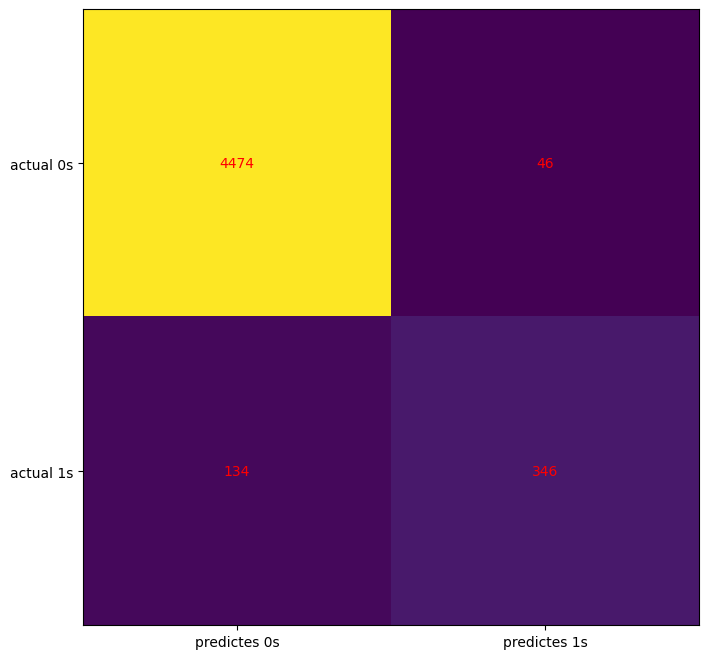

In [46]:
cm = metrics.confusion_matrix(y2 , lograge2.predict(x2))
fig,ax = plt.subplots(figsize=(8 , 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=('predictes 0s','predictes 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('actual 0s','actual 1s'))
ax.set_ylim (1.5 , -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j , i,cm[i,j], ha='center' , va='center' , color='red')
plt.show()

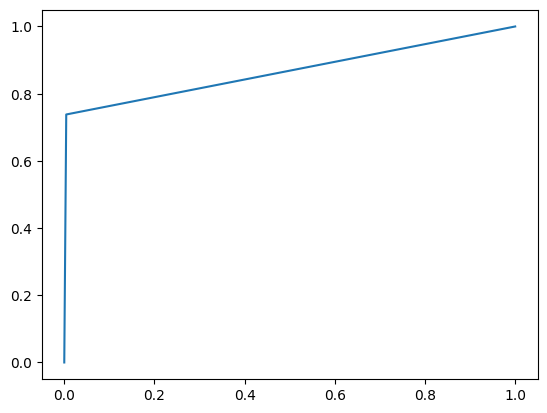

In [47]:
fpr,tpr,_ = metrics.roc_curve(y_test2,y_pred2)
plt.plot(fpr ,tpr)
plt.show()

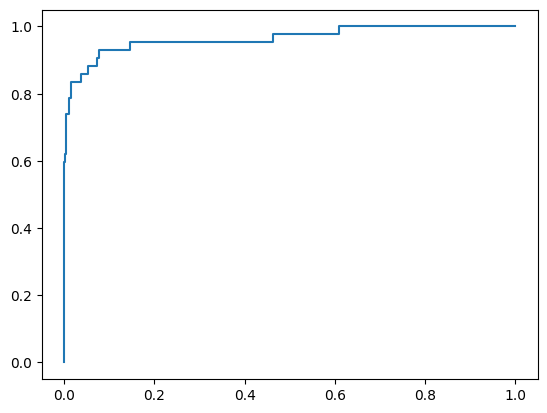

In [48]:
y_pred_proba = lograge2.predict_proba(x_test2)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test2,y_pred_proba)
plt.plot(fpr ,tpr)
plt.show()

In [49]:
print('mean_absolute_error : ' , metrics.mean_absolute_error(y_test2 , y_pred2))
print('mean_squared_error : ' , metrics.mean_squared_error(y_test2 , y_pred2))
print('RMSE : ' ,np.sqrt(metrics.mean_squared_error(y_test2 , y_pred2)) )
print('r2_score : ', metrics.r2_score(y_test2 , y_pred2))
print ('accuracy :' , metrics.accuracy_score(y_test2 , y_pred2))

mean_absolute_error :  0.026
mean_squared_error :  0.026
RMSE :  0.161245154965971
r2_score :  0.6620919110002079
accuracy : 0.974


In [50]:
predict1 = lograge2.predict([[360,34,9,180,93023,1,106.8,3,0,0,1,0,0,0]])
predict1

array([1], dtype=int64)

In [56]:
def run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded):
    models = {
        "LogisticRegression": LogisticRegression(),
        #"SVC": SVC(),
        #"DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
        #"RandomForestClassifier": RandomForestClassifier(random_state=42),
        "KNeighborsClassifier": KNeighborsClassifier(),
        #"GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
        #"GaussianNB": GaussianNB(),
        #"LDA":LinearDiscriminantAnalysis(),
        #"GPC":GaussianProcessClassifier()
    }

    # Create an empty DataFrame to store model performance
    model_performance = []

    for name, model in models.items():
        model.fit(X_train_scaled, y_train_encoded)
        predictions = model.predict(X_test_scaled)
        accuracy = metrics.accuracy_score(y_test_encoded, predictions)
        model_performance.append({
            "Model": name,
            "Accuracy": accuracy
        })

    return pd.DataFrame(model_performance)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
models = run_all_models(X_train, X_test, y_train, y_test)
models.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy
0,LogisticRegression,0.907
1,KNeighborsClassifier,0.900


In [60]:
scaler = StandardScaler()
X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)
models = run_all_models(X_train_scaled, X_test_scaled, y_train, y_test)
models.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy
0,LogisticRegression,0.955
1,KNeighborsClassifier,0.954
